<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/stats_vs_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individualism and Development
This exercise explore the relationship between national culture and economic development. Specifically, we use the GDP per Capita data from the World Development Indicators and the Individualism vs Collectivitism (IDV) index from Hofstede's national culture model to explore this relationship.

## First Import the necessary library

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import model_selection as ms

## Step 2 - Load and Explore Data

In [17]:
df = pd.read_csv("wdi_data.csv")
df.head()

,Unnamed: 0,Year,SP.POP.TOTL,NY.GDP.PCAP.PP.CD,Country Code,Country Name,Region,Income Group,Lending Type,IDV
0,0,2010,40788453,18061.934359,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,46
1,1,2011,41261490,19322.227124,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,46
2,2,2012,41733271,19641.352864,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,46
3,3,2013,42202935,20131.680425,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,46
4,4,2014,42669500,19683.771506,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,46


In [18]:
# Use 2019 data.  only one feature

df2019 = df.query("Year == 2019")
df2019.shape

(60, 10)

In [15]:
fig = px.scatter(df2019, 
                 x="IDV", 
                 y="NY.GDP.PCAP.PP.CD", 
                 hover_name="Country Name", 
                 trendline="ols")

fig.show()

## Step 3 - Perform ordinary least square (OLS) linear regression.

In [6]:
X = df2019[["IDV"]].values
y = df2019["NY.GDP.PCAP.PP.CD"].values

X = sm.add_constant(X)
model = sm.OLS(y,X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     24.87
Date:                Thu, 13 May 2021   Prob (F-statistic):           5.90e-06
Time:                        19:24:22   Log-Likelihood:                -679.04
No. Observations:                  60   AIC:                             1362.
Df Residuals:                      58   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.244e+04   5890.839      2.111      0.0

## Step 4 - Observation & Conclusion
The p-value for coefficient of the independent variable (IDV) is far less than 0.005. This indicate there is a significant positive correlation between the IDV and the GDP per Capita indicating culture plays an important role in economic development.

The coefficient of determination R-squared is 30% meaning that 30% of the variation in GDP per Capita can be explained by the IDV variable. This means culture not only plays a statistically significant role but also with a sizable effect on the economic development.

# Step 5 - Use Machine Learning for Predictive Analysis
First, we use the scikit-learn liner model to fit the data and display the results which are consistent with the statsmodel's OLS model. However, scikit-learn does not provide as many statistics as statsmodels does. This reflects the difference between Inferencial Statistics and Machine Learning. The former focuses on conclusive inference which requires more rigorous statistical testing while the latter cares more for the accuracy of prediction. 

In [23]:
model2 = lm.LinearRegression()
results2 = model2.fit(X, y)
print("Intercept = ", model2.intercept_)
print("Coefficient = ", model2.coef_)
print("coefficient of determination = ", model2.score(X, y))

Intercept =  12435.19062910134
Coefficient =  [  0.         562.57265486]
coefficient of determination =  0.30007862848566225


In [33]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 2)
(15, 2)
(45,)
(15,)


In [46]:
results3 = model2.fit(X_train, y_train)
print("Intercept = ", model2.intercept_)
print("Coefficient = ", model2.coef_)
print("coefficient of determination = ", model2.score(X_train, y_train))

Intercept =  18744.82818836475
Coefficient =  [  0.         482.62329066]
coefficient of determination =  0.23168959660096358


In [47]:
y_pred = model2.predict(X_test)
print(y_pred)
print(model2.score(X_test, y_test))

[25501.55425763 34188.77348955 45289.10917477 43841.23930279
 43358.61601212 33223.52690822 47219.60233742 40945.49955882
 26466.80083896 40945.49955882 38532.38310551 28397.2940016
 30810.41045491 28397.2940016  55424.19827867]
0.1649737730176697


In [36]:
X_test

array([[ 1., 14.],
       [ 1., 32.],
       [ 1., 55.],
       [ 1., 52.],
       [ 1., 51.],
       [ 1., 30.],
       [ 1., 59.],
       [ 1., 46.],
       [ 1., 16.],
       [ 1., 46.],
       [ 1., 41.],
       [ 1., 20.],
       [ 1., 25.],
       [ 1., 20.],
       [ 1., 76.]])

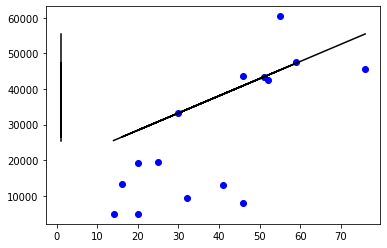

In [45]:
plt.scatter(X_test[:,1:2], y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()